In [1]:
# Creating a graph

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G = nx.Graph()

In [4]:
G.add_node(1)

In [5]:
G.add_nodes_from([2, 3])

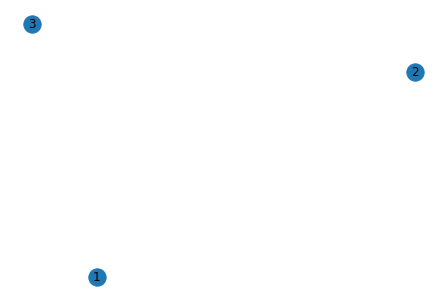

In [6]:
nx.draw(G, with_labels=True)

In [7]:
G.add_edge(1, 2)

/Users/duksoon/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


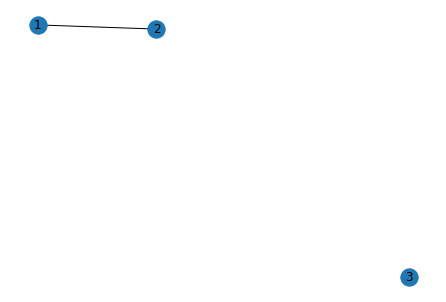

In [8]:
nx.draw(G, with_labels=True)

In [9]:
G.add_edges_from([(2,3),(1,3)])

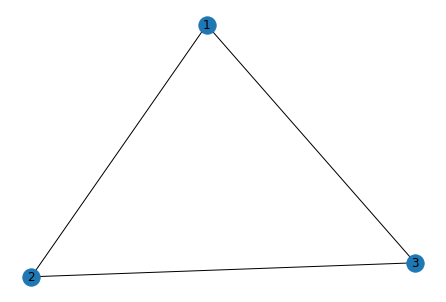

In [10]:
nx.draw(G, with_labels=True)

In [11]:
G.number_of_nodes()

3

In [12]:
G.number_of_edges()

3

In [13]:
G.nodes

NodeView((1, 2, 3))

In [14]:
list(G.nodes)

[1, 2, 3]

In [15]:
list(G.edges)

[(1, 2), (1, 3), (2, 3)]

In [16]:
list(G.adj[1])

[2, 3]

In [17]:
G.degree[2]

2

In [18]:
G.remove_edge(2,3)

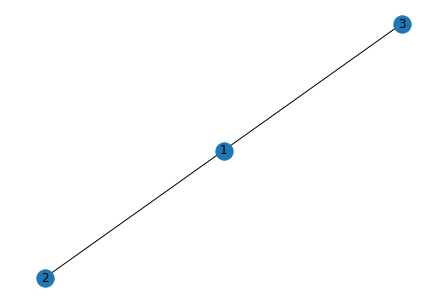

In [19]:
nx.draw(G, with_labels=True)

In [20]:
G.remove_node(3)

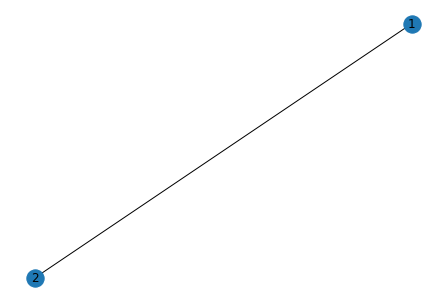

In [21]:
nx.draw(G, with_labels=True)

In [22]:
# directed graph

In [23]:
DG = nx.DiGraph()

In [25]:
DG.add_nodes_from([1, 2, 3, 4])

In [26]:
DG.add_edge(1,2)

In [27]:
DG.add_edge(1,3)

In [28]:
DG.add_edge(2,4)

/Users/duksoon/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


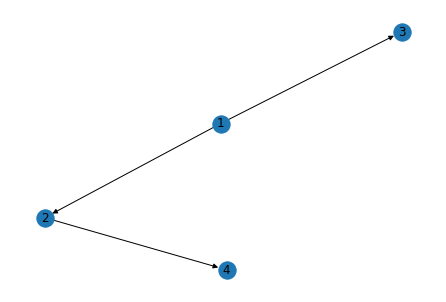

In [29]:
nx.draw(DG, with_labels=True)

In [30]:
list(DG.successors(1))

[2, 3]

In [31]:
list(DG.predecessors(2))

[1]

In [32]:
G.clear()

In [33]:
DG.clear()

In [34]:
# predefined graphs

In [35]:
G = nx.petersen_graph()

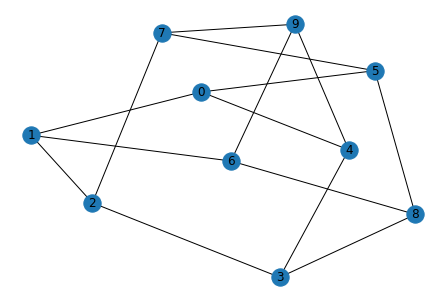

In [36]:
nx.draw(G, with_labels=True)

In [37]:
G.number_of_nodes()

10

In [38]:
G.number_of_edges()

15

In [39]:
list(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
list(G.edges)

[(0, 1),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 6),
 (2, 3),
 (2, 7),
 (3, 4),
 (3, 8),
 (4, 9),
 (5, 7),
 (5, 8),
 (6, 8),
 (6, 9),
 (7, 9)]

In [41]:
list(G.adj[0])

[1, 4, 5]

In [43]:
G.degree[2]

3

In [44]:
list(G.edges(7))

[(7, 2), (7, 5), (7, 9)]

In [45]:
# DFS

In [49]:
def DFS(graph, start, visited):
    visited[start] = True
    print(start)
    for i in graph.adj[start]:
        if visited[i] == False:
            DFS(graph, i, visited)

In [50]:
visited = [False] * G.number_of_nodes()

In [51]:
DFS(G, 0, visited)

0
1
2
3
4
9
6
8
5
7


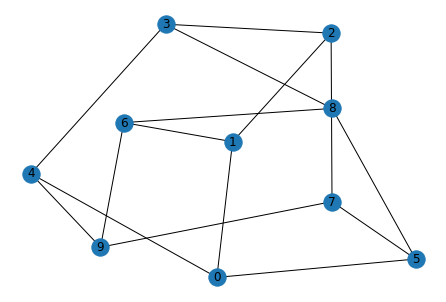

In [52]:
nx.draw(G, with_labels=True)

In [53]:
import queue
def DFS_iterative(graph, start):
    visited = [False] * G.number_of_nodes()
    S = queue.LifoQueue()
    S.put(start)
    while S.qsize() > 0:
        v = S.get()
        if visited[v] == False:
            print(v)
            visited[v] = True
        for i in graph.adj[v]:
            if visited[i] == False:
                S.put(i)

In [54]:
DFS_iterative(G, 0)

0
5
8
6
9
7
2
3
4
1


In [55]:
# BFS

In [56]:
import queue
def BFS(graph, start):
    visited = [False] * G.number_of_nodes()
    Q = queue.Queue()
    Q.put(start)
    visited[start] = True
    while Q.empty() == False:
        v = Q.get()
        print(v)
        for i in graph.adj[v]:
            if visited[i] == False:
                Q.put(i)
                visited[i] = True

In [57]:
BFS(G, 0)

0
1
4
5
2
6
3
9
7
8


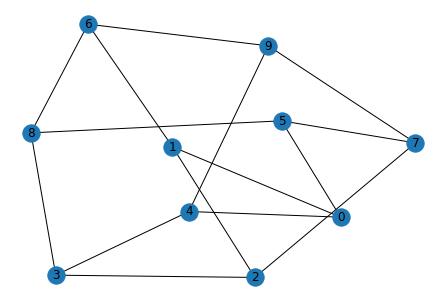

In [58]:
nx.draw(G, with_labels=True)

In [59]:
# connected components

In [60]:
def DFS_CC(graph, cc, start, visited):
    visited[start] = True
    cc.append(start)
    for i in graph.adj[start]:
        if visited[i] == False:
            DFS_CC(graph, cc, i, visited)

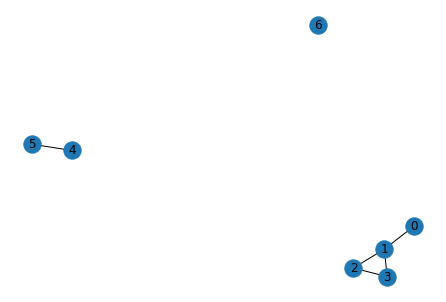

In [61]:
G2 = nx.Graph()
G2.add_nodes_from([0, 1, 2, 3, 4, 5, 6])
G2.add_edges_from([(0,1), (1,2), (1,3), (2,3), (4,5)])
nx.draw(G2, with_labels=True)

In [62]:
visited = [False] * G2.number_of_nodes()
res = []
for v in list(G2.nodes):
    if visited[v] == False:
        cc = []
        DFS_CC(G2, cc, v, visited)
        res.append(cc)
print(res)

[[0, 1, 2, 3], [4, 5], [6]]


In [63]:
# shortest distance between two vertices

In [64]:
import queue
def BFS_SD(graph, start, end):
    visited = [False] * graph.number_of_nodes()
    dist = [0] * graph.number_of_nodes()
    Q = queue.Queue()
    dist[start] = 0
    Q.put(start)
    visited[start] = True
    while Q.empty() == False:
        v = Q.get()
        if v == end:
            return dist[v]
        for i in graph.adj[v]:
            if visited[i] == False:
                dist[i] = dist[v] + 1
                Q.put(i)
                visited[i] = True

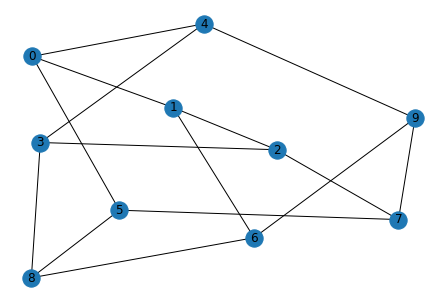

In [65]:
nx.draw(G, with_labels=True)

In [66]:
BFS_SD(G, 0, 0)

0

In [67]:
BFS_SD(G, 0, 1)

1

In [68]:
BFS_SD(G, 0, 2)

2